In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, QuantileTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, recall_score

sns.set()

In [2]:
#load balanced dataset with no milticolinearity
diabetes=pd.read_csv('diabetes_prepross.csv')

#split targets and inputs
targets1=diabetes['Diabetes']
inputs1=diabetes.drop(['Diabetes'],axis=1)

In [3]:
#shuffle the data
inputs1=np.asarray(inputs1)
shuffled_indices=np.arange(inputs1.shape[0])
np.random.shuffle(shuffled_indices)

In [4]:
#shuffle the data
shuffled_indices=np.arange(inputs1.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs=inputs1[shuffled_indices]
shuffled_targets=targets1[shuffled_indices]

In [5]:
#split the dataset into training, validation and test
samples_count=shuffled_inputs.shape[0]
train_samples_count=int(0.8*samples_count)
validation_samples_count=int(0.1*samples_count)
test_samples_count=samples_count-(train_samples_count+validation_samples_count)

train_inputs=shuffled_inputs[:train_samples_count]
train_targets=shuffled_targets[:train_samples_count]

validation_inputs=shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets=shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

test_inputs=shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets=shuffled_targets[train_samples_count+validation_samples_count:]

In [6]:
#standarize the inputs

scaler=StandardScaler()
quantile_reg=QuantileTransformer(output_distribution='normal')

train_inputs=quantile_reg.fit_transform(train_inputs)
train_inputs=scaler.fit_transform(train_inputs)


validation_inputs=quantile_reg.transform(validation_inputs)
validation_inputs=scaler.transform(validation_inputs)


test_inputs=quantile_reg.transform(test_inputs)
test_inputs=scaler.transform(test_inputs)


# scaled_inputs1=preprocessing.scale(inputs1)

In [7]:
#save the datasets in npz format
np.savez('diabetes_data_train',inputs=train_inputs,targets=train_targets)
np.savez('diabetes_data_validation',inputs=validation_inputs,targets=validation_targets)
np.savez('diabetes_data_test',inputs=test_inputs,targets=test_targets)

In [8]:
npz=np.load('diabetes_data_test.npz')

In [9]:
#load the data

#training data
npz=np.load('diabetes_data_train.npz')
train_inputs=npz['inputs'].astype(np.float_)
train_targets=npz['targets'].astype(np.int_)

#validation data
npz=np.load('diabetes_data_validation.npz')
validation_inputs=npz['inputs'].astype(np.float_)
validation_targets=npz['targets'].astype(np.int_)

npz=np.load('diabetes_data_test.npz')
test_inputs=npz['inputs'].astype(np.float_)
test_targets=npz['targets'].astype(np.int_)

In [ ]:
#create the model

input_size=14 #number of parameters
output_size=2 # number of outputs (yes or no, classification problem)
hidden_layer_size=70 # quite of a magic number (input_size * 5)

#programming and early stop to prevent overfitting
early_stop=tf.keras.callbacks.EarlyStopping(patience=2)

# 4 hidden layers
model=tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

batch_size=100
max_epochs=100

history=model.fit(train_inputs,
    train_targets,
    batch_size=batch_size,
    epochs=max_epochs,
    validation_data=(validation_inputs,validation_targets),
    callbacks=[early_stop],
    verbose=2)

Epoch 1/100
503/503 - 1s - loss: 0.5685 - accuracy: 0.7105 - val_loss: 0.5701 - val_accuracy: 0.7167 - 1s/epoch - 3ms/step
Epoch 2/100
503/503 - 1s - loss: 0.5612 - accuracy: 0.7166 - val_loss: 0.5645 - val_accuracy: 0.7192 - 564ms/epoch - 1ms/step
Epoch 3/100
503/503 - 1s - loss: 0.5597 - accuracy: 0.7175 - val_loss: 0.5650 - val_accuracy: 0.7221 - 586ms/epoch - 1ms/step
Epoch 4/100
503/503 - 1s - loss: 0.5588 - accuracy: 0.7180 - val_loss: 0.5646 - val_accuracy: 0.7186 - 583ms/epoch - 1ms/step


In [28]:
#create the model

input_size=14 #number of parameters
output_size=2 # number of outputs (yes or no, classification problem)
hidden_layer_size=70 # quite of a magic number (input_size * 5)

#programming and early stop to prevent overfitting
early_stop=tf.keras.callbacks.EarlyStopping(patience=2)

# 4 hidden layers
model=tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size,activation='sigmoid'),
    tf.keras.layers.Dense(hidden_layer_size,activation='sigmoid'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

''' optimizers: 
Adadelta(3) (0.7123) (100 epochs)
Adagrad(3) (0.7135) (100 epochs)
adam (5) (0.7181) (5 epochs)
Adamax (5) (0.7179) (6 epochs)
Nadam (5) (0.7161) (3 epochs)
Ftrl (1) 
SGD (4) (0.7167) (10 epochs)

'''

batch_size=100
max_epochs=100

history=model.fit(train_inputs,
    train_targets,
    batch_size=batch_size,
    epochs=max_epochs,
    validation_data=(validation_inputs,validation_targets),
    callbacks=[early_stop],
    verbose=2)

ValueError: Unknown optimizer: 'Optimizer'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [11]:
#test the model
test_loss,test_accuracy=model.evaluate(test_inputs,test_targets)
print(test_loss)
print(test_accuracy)

197/197 [==============================] - 0s 984us/step - loss: 0.5708 - accuracy: 0.7099
0.5707846283912659
0.7098932862281799


In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


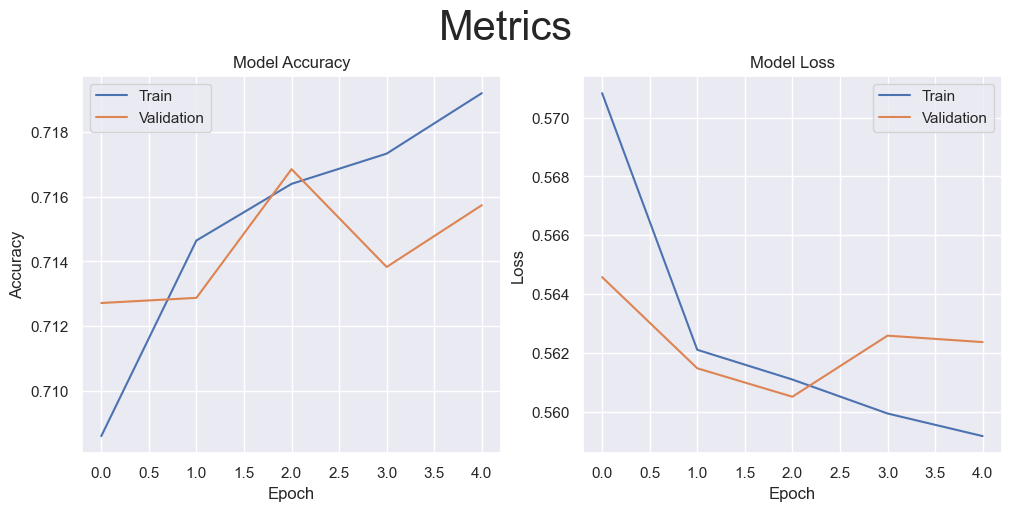

In [13]:
fig1=plt.figure(constrained_layout=True,figsize=(10,5))
axs1=fig1.add_gridspec(1,2)

axs1_0=fig1.add_subplot(axs1[0,0])
axs1_0.plot(history.history['accuracy'])
axs1_0.plot(history.history['val_accuracy'])
axs1_0.set_title('Model Accuracy')
axs1_0.set_ylabel('Accuracy')
axs1_0.set_xlabel('Epoch')
axs1_0.legend(['Train','Validation'],loc='best')

axs1_1=fig1.add_subplot(axs1[0,1])
axs1_1.plot(history.history['loss'])
axs1_1.plot(history.history['val_loss'])
axs1_1.set_title('Model Loss')
axs1_1.set_ylabel('Loss')
axs1_1.set_xlabel('Epoch')
axs1_1.legend(['Train','Validation'],loc='best')

fig1.suptitle('Metrics',size=30)

plt.show()

#If validation accuracy is less than the training accuracy then the model is overfitting 

In [14]:
#plot confusion matrix
predict_x=model.predict(test_inputs) 
y_prediction=np.argmax(predict_x,axis=1)


197/197 [==============================] - 0s 726us/step


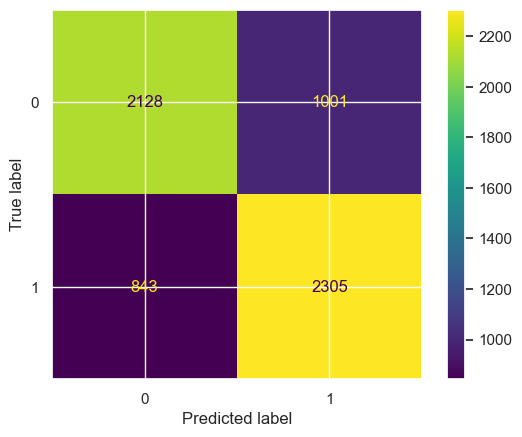

In [15]:
c_matrix1=confusion_matrix(test_targets,y_prediction)
cm_display1=ConfusionMatrixDisplay(confusion_matrix=c_matrix1,display_labels=unique_labels(test_targets))
cm_display1.plot()

[1 1 1 ... 1 0 0]
0.5
0.7061502065158377


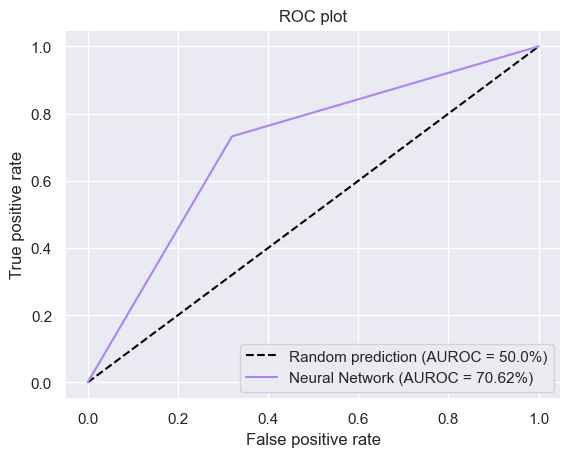

In [16]:
# plot roc
r_probs=[0 for _ in range(len(test_targets))]

r_auc=roc_auc_score(test_targets,r_probs)
model_auc=roc_auc_score(test_targets,y_prediction)
print(y_prediction)

print(r_auc)
print(model_auc)

#Calculate the curve
r_fpr, r_tpr, _ =roc_curve(test_targets,r_probs)
model_fpr, model_tpr, _=roc_curve(test_targets,y_prediction)

plt.plot(r_fpr,r_tpr,label=f'Random prediction (AUROC = {round(r_auc*100,2)}%)',c='black', linestyle='--')
plt.plot(model_fpr,model_tpr,label=f'Neural Network (AUROC = {round(model_auc*100,2)}%)',c='#ae81ff')
plt.title('ROC plot')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')


0.6448098634914441
0.7322109275730623


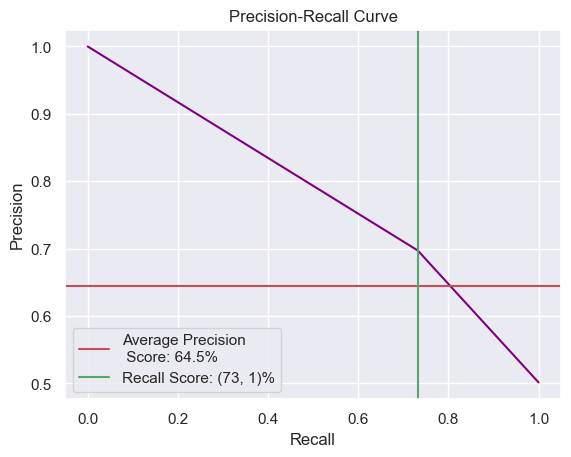

In [17]:
#plot precision recall
precision, recall, thresholds=precision_recall_curve(test_targets,y_prediction)
precision_av_score=average_precision_score(test_targets,y_prediction)
av_recall_score=recall_score(test_targets,y_prediction)
print(precision_av_score)
print(av_recall_score)

fig,ax=plt.subplots()
ax.plot(recall, precision, color='purple')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.axhline(y = precision_av_score, color = 'r', linestyle = '-',label=f'Average Precision\n Score: {round(precision_av_score*100,1)}%')
ax.axvline(av_recall_score,color='g',label=f'Recall Score: {round(av_recall_score*100),1}%')

ax.legend()